In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (Linear Regression and Evaluation)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/Users/vishal/Desktop/CSV files/Labourtraining.csv')

In [3]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
print(df.columns)

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')


In [5]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


### Handle Missing Values


In [8]:
df = df.dropna()

### Encode Categorical Variables Convert categorical variables (e.g., Race, Hispanic, Married) into numeric form.

In [10]:
# Convert categories into numerical values (e.g., 0 and 1)
df['Race'] = df['Race'].apply(lambda x: 1 if x == 'Black' else 0)
df['Hisp'] = df['Hisp'].apply(lambda x: 1 if x == 'Yes' else 0)
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
print(df[['Race', 'Hisp', 'MaritalStatus']].head())

   Race  Hisp  MaritalStatus
0     0     0              0
1     0     0              0
2     0     0              0
3     0     0              0
4     0     0              0


In [12]:
# Features for prediction
X = df[['Age', 'Race', 'Eduacation', 'Hisp', 'MaritalStatus', 'Earnings_1974', 'Earnings_1975']]

# Target variable
y = df['Earnings_1978']


In [13]:
print(df.columns)


Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')


# Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Linear Regression Model

In [17]:
X = df[['Age', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg', 'Earnings_1974', 'Earnings_1975']]
y = df['Earnings_1978']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the Model


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 48607834.103273086
R-squared Score: 0.47690656591862246


# Analyze the Coefficients

In [22]:
# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


         Feature   Coefficient
0            Age -1.066479e+02
1           Race -9.265411e-11
2           Hisp -2.246764e-11
3  MaritalStatus  1.705303e-13
4          Nodeg -4.028111e+02
5  Earnings_1974  2.804689e-01
6  Earnings_1975  4.820691e-01


# Visualize Predictions

# Scatter Plot

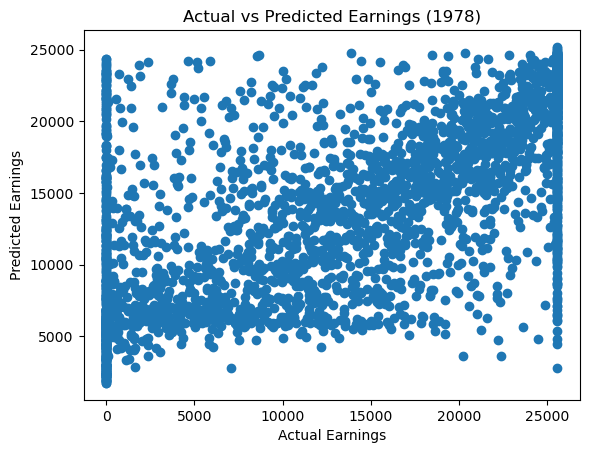

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Earnings")
plt.ylabel("Predicted Earnings")
plt.title("Actual vs Predicted Earnings (1978)")
plt.show()


# Residual Plot

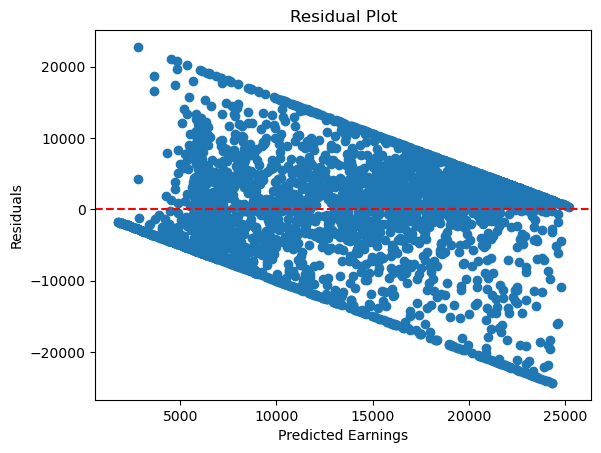

In [27]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Earnings")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Make Predictions on New Data

In [29]:
# Example new data
new_data = pd.DataFrame({
    'Age': [35],
    'Race': [1],
    'Hisp': [0],
    'MaritalStatus': [1],
    'Nodeg': [0],
    'Earnings_1974': [15000],
    'Earnings_1975': [16000]
})

# Predict earnings for 1978
predicted_earnings = model.predict(new_data)
print("Predicted Earnings for 1978:", predicted_earnings)


Predicted Earnings for 1978: [16204.28454823]
